# Python Basics and Single-Cell Practice

This notebook combines:
- core Python fundamentals (strings, types, lists, dictionaries)
- basic use of `pandas` for working with single-cell metadata and counts
- simple QC-style plots for single-cell RNA-seq (nCount_RNA, nFeature_RNA, mitochondrial genes)


In [51]:
# Basic Python: strings, numbers, booleans

print("Hello Python 👋")

# A toy single-cell barcode and marker values
barcode = "AATGAAACTGAAGGAAAA"
CD34_norm = 5.1       # normalised CD34 expression (example)
CD34_count = 10       # raw count
CD34_marker = True    # marker presence as a boolean

barcode, CD34_norm, CD34_count, CD34_marker


Hello Python 👋


('AATGAAACTGAAGGAAAA', 5.1, 10, True)

In [52]:
# Check Python types
print(type(barcode))       # string
print(type(CD34_norm))     # float
print(type(CD34_count))    # int
print(type(CD34_marker))   # bool

# Convert CD34_count to string
CD34_count_str = str(CD34_count)
print(CD34_count_str, type(CD34_count_str))


<class 'str'>
<class 'float'>
<class 'int'>
<class 'bool'>
10 <class 'str'>


In [53]:
# Explore string methods using dir()
dir(barcode)[:15]  # show first few methods

# Replace 'T' with 'U' to mimic DNA -> RNA
barcode_rna = barcode.replace("T", "U")
print("DNA barcode :", barcode)
print("RNA barcode :", barcode_rna)


DNA barcode : AATGAAACTGAAGGAAAA
RNA barcode : AAUGAAACUGAAGGAAAA


In [54]:
# Converting and working with booleans
present = True
print(present, type(present))

present_str = str(present)
print(present_str, type(present_str))

# Convert back to bool (careful: this is always True unless the string is empty)
present_back = bool(present_str)
print(present_back, type(present_back))


True <class 'bool'>
True <class 'str'>
True <class 'bool'>


## Lists and favourite genes


In [55]:
# A simple Python list of favourite genes
my_fave_genes = ["PRKN", "APOE", "C9orf72"]
print("Original list:", my_fave_genes)

# Append another gene
my_fave_genes.append("PSEN1")
print("Updated list:", my_fave_genes)

# Access elements
print("First gene:", my_fave_genes[0])
print("Last gene:", my_fave_genes[-1])


Original list: ['PRKN', 'APOE', 'C9orf72']
Updated list: ['PRKN', 'APOE', 'C9orf72', 'PSEN1']
First gene: PRKN
Last gene: PSEN1


## Dictionaries

Python dictionaries store key–value pairs.  
Here we combine cluster names with a simple start date.


In [56]:
# A small dictionary example
my_dict = {
    "clusters": ["cluster_0", "cluster_1", "cluster_2"],
    "start_date": "2025-11-17"
}

my_dict


{'clusters': ['cluster_0', 'cluster_1', 'cluster_2'],
 'start_date': '2025-11-17'}

## Working with `pandas` and single-cell metadata

Now we switch to data analysis:
- load a small **metadata table** (`mini_meta.csv`)
- optionally load a **counts matrix** (`mini_counts.csv`)
- explore shapes, column types, and basic QC summaries


In [57]:
import pandas as pd

# Adjust the paths if your files are stored differently
meta = pd.read_csv("c:\\Users\\Samap\\OneDrive\\Desktop\\New folder\\sama\\Data annalysis\\Python\\Single_Cell_Seq/mini_meta.csv", index_col=0)
counts = pd.read_csv("c:\\Users\\Samap\\OneDrive\\Desktop\\New folder\\sama\\Data annalysis\\Python\\Single_Cell_Seq/mini_counts.csv", index_col=0)




In [58]:
# Look at the metadata
meta.head()


,orig.ident,nCount_RNA,nFeature_RNA,cellid
barcode,,,,
AAACATTGAGCTAC-1,scb2b,4903,1352,AAACATTGAGCTAC-1
AAACATTGATCAGC-1,scb2b,3149,1131,AAACATTGATCAGC-1
AAACCGTGCTTCCG-1,scb2b,2639,960,AAACCGTGCTTCCG-1
AAACTTGAAAAACG-1,scb2b,3918,1116,AAACTTGAAAAACG-1
AAAGAGACGCGAGA-1,scb2b,3034,1059,AAAGAGACGCGAGA-1


In [59]:
# Summary info and data types
meta.info()
meta.dtypes


<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, AAACATTGAGCTAC-1 to TTTCTACTGAGGCA-1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   orig.ident    808 non-null    object
 1   nCount_RNA    808 non-null    int64 
 2   nFeature_RNA  808 non-null    int64 
 3   cellid        808 non-null    object
dtypes: int64(2), object(2)
memory usage: 31.6+ KB


orig.ident      object
nCount_RNA       int64
nFeature_RNA     int64
cellid          object
dtype: object

In [60]:
# Access key columns 
meta.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellid'], dtype='object')

# Example of label-based and position-based indexing

In [61]:
# Example of label-based and position-based indexing

# a specific cell (change ID to one that exists in your data)
example_cell_id = meta.index[0]
meta.loc[example_cell_id, :]

# first 2 rows using iloc
meta.iloc[0:2, :]


,orig.ident,nCount_RNA,nFeature_RNA,cellid
barcode,,,,
AAACATTGAGCTAC-1,scb2b,4903,1352,AAACATTGAGCTAC-1
AAACATTGATCAGC-1,scb2b,3149,1131,AAACATTGATCAGC-1


## Basic QC plots with Matplotlib and Seaborn

We will:
- plot histograms of `nCount_RNA` and `nFeature_RNA`
- create a violin plot for a mitochondrial gene
- visualise mitochondrial genes using a heatmap
- explore the relationship between two mitochondrial genes using a joint plot

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
meta.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellid'], dtype='object')

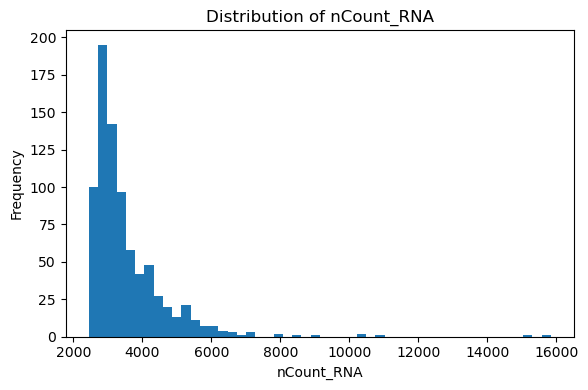

In [64]:
plt.figure(figsize=(6, 4))
plt.hist(meta["nCount_RNA"], bins=50)
plt.xlabel("nCount_RNA")
plt.ylabel("Frequency")
plt.title("Distribution of nCount_RNA")
plt.tight_layout()

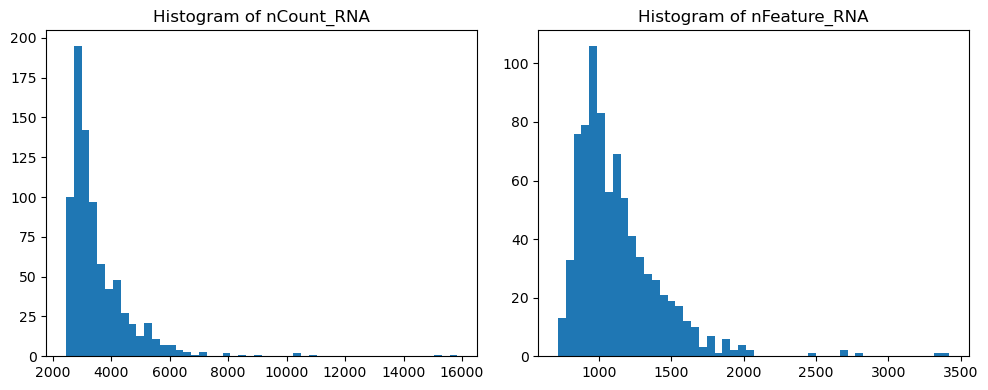

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(meta["nCount_RNA"], bins=50)
axes[0].set_title("Histogram of nCount_RNA")

axes[1].hist(meta["nFeature_RNA"], bins=50)
axes[1].set_title("Histogram of nFeature_RNA")

plt.tight_layout()


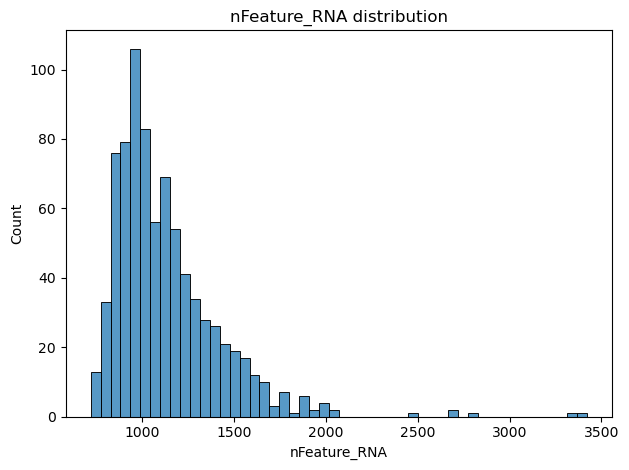

In [66]:
sns.histplot(meta["nFeature_RNA"], bins=50)
plt.xlabel("nFeature_RNA")
plt.title("nFeature_RNA distribution")
plt.tight_layout()

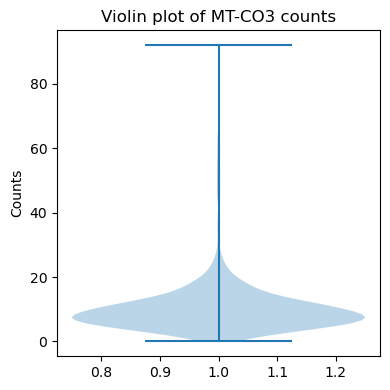

In [67]:
# Make sure "MT-CO3" exists in your counts matrix
if "MT-CO3" in counts.columns:
    plt.figure(figsize=(4, 4))
    plt.violinplot(counts["MT-CO3"])
    plt.title("Violin plot of MT-CO3 counts")
    plt.ylabel("Counts")
    plt.tight_layout()
else:
    print("MT-CO3 not found in counts columns.")

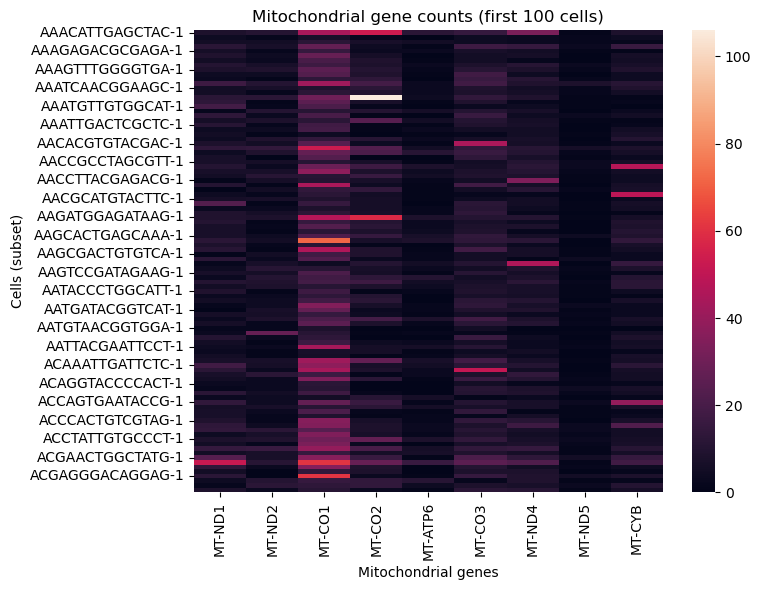

In [68]:
# Select mitochondrial genes (columns starting with 'MT-')
mt_genes = counts.filter(regex="^MT-")

# Take a subset of cells for plotting (e.g., first 100)
subset = mt_genes.iloc[0:100, :]

plt.figure(figsize=(8, 6))
sns.heatmap(subset)
plt.title("Mitochondrial gene counts (first 100 cells)")
plt.xlabel("Mitochondrial genes")
plt.ylabel("Cells (subset)")
plt.tight_layout()


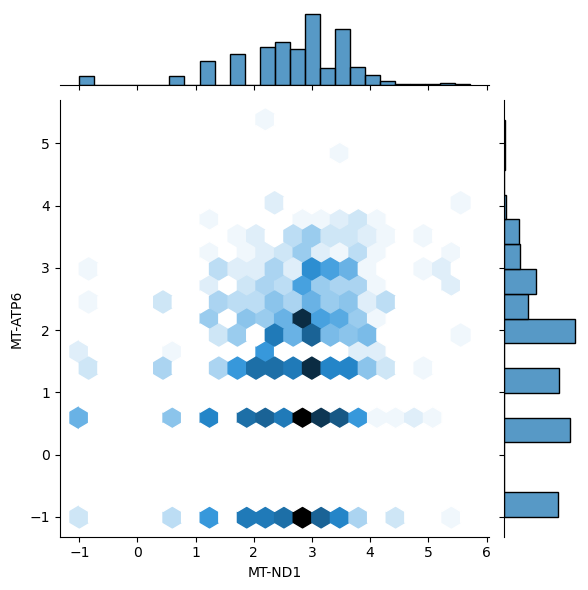

In [69]:
# Check that both genes exist before plotting
required_genes = ["MT-ND1", "MT-ATP6"]
if all(gene in counts.columns for gene in required_genes):
    x = (counts["MT-ND1"] + 0.5).transform("log2")
    y = (counts["MT-ATP6"] + 0.5).transform("log2")

    sns.jointplot(x=x, y=y, kind="hex")
else:
    print("MT-ND1 or MT-ATP6 not found in counts columns.")
